In [ ]:
# https://twitter.com/strom_m/status/1203825369901490176
# https://www.aavso.org/data-download/aavsodata_5e01fcca27ea3.txt

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
import warnings
warnings.filterwarnings('ignore')
from astropy.time import Time
from datetime import datetime
from dateutil import parser

In [27]:
cols = ['JD', 'Magnitude']
df = pd.read_csv('data/aavsodata_betelgeuse.txt', usecols=cols)
df.columns = ['JD', 'Mag']

In [28]:
df.head()

,JD,Mag
0,2419789.5,1.1
1,2421597.3,1.0
2,2421602.4,0.8
3,2421607.3,0.9
4,2421612.3,0.8


In [34]:
def jd_date(jd):
    t_iso = Time(jd, format='jd', scale='utc').iso
#     dt = datetime.strptime(t_iso, '%Y-%m-%d %H:%M:%S.%f')
#     jd_date(jd)
    return parser.parse(t_iso[:10]) #dt.date()

In [35]:
for idx in range(3):
    jd = df['JD'][idx]
    print(idx, df['Mag'][idx], jd_date(jd), jd)

0 1.1 1913-01-22 00:00:00 2419789.5
1 1.0 1918-01-03 00:00:00 2421597.3
2 0.8 1918-01-08 00:00:00 2421602.4


In [36]:
df['date'] = df['JD'].apply(jd_date)

In [37]:
df.head()

,JD,Mag,date
0,2419789.5,1.1,1913-01-22
1,2421597.3,1.0,1918-01-03
2,2421602.4,0.8,1918-01-08
3,2421607.3,0.9,1918-01-13
4,2421612.3,0.8,1918-01-18


In [38]:
del df['JD']
df.head()

,Mag,date
0,1.1,1913-01-22
1,1.0,1918-01-03
2,0.8,1918-01-08
3,0.9,1918-01-13
4,0.8,1918-01-18


In [39]:
df = df.drop_duplicates(subset='date', keep="first")

In [40]:
df['Mag'] = df['Mag'].astype(float)
df['Mag'].describe()

count    14343.000000
mean         0.715593
std          0.368371
min         -4.103000
25%          0.500000
50%          0.700000
75%          0.900000
max          4.747000
Name: Mag, dtype: float64

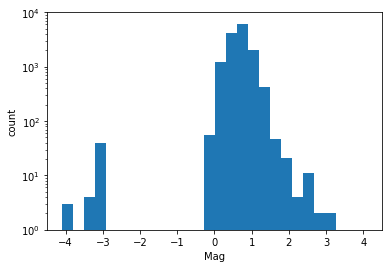

In [41]:
plt.hist(df['Mag'], bins=30)
plt.yscale('log')
plt.xlabel('Mag')
plt.ylabel('count')
plt.axis([-4.5, 4.5, 1, 1e4]);

In [42]:
df = df.set_index('date')

In [43]:
len(df.resample('M'))#.mean()

1284

In [44]:
df.head()

,Mag
date,
1913-01-22,1.1
1918-01-03,1.0
1918-01-08,0.8
1918-01-13,0.9
1918-01-18,0.8


In [75]:
# df['2d'] = df.iloc[:,0].rolling(window=2).mean()
df_as = df.resample('AS').median().dropna()
df_as.head()

,Mag
date,
1913-01-01,1.1
1918-01-01,0.9
1921-01-01,0.9
1922-01-01,0.8
1923-01-01,0.8


In [76]:
df_mo = df.resample('M').median().dropna()
df_mo.head()

,Mag
date,
1913-01-31,1.1
1918-01-31,0.9
1918-02-28,0.9
1918-03-31,0.9
1921-08-31,1.3


In [77]:
len(df_mo), len(df_as)

(954, 99)

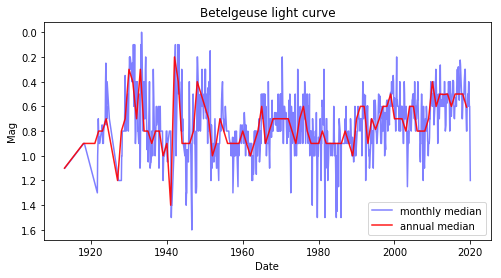

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 4)
ax.plot(df_mo.index, df_mo['Mag'], 'b', alpha=.5, label='monthly median')
ax.plot(df_as.index, df_as['Mag'], 'r', alpha=.9, label='annual median')
ax.set_xlabel('Date')
ax.set_ylabel('Mag')
ax.set_title('Betelgeuse light curve')
ax.set_ylim(ax.get_ylim()[::-1])
ax.legend(loc='lower right');

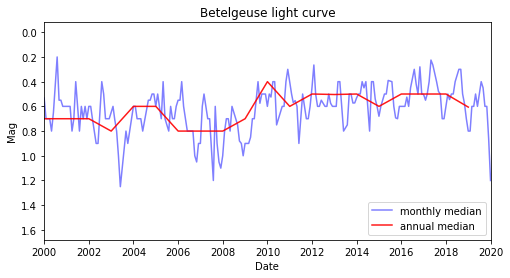

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 4)
ax.plot(df_mo.index, df_mo['Mag'], 'b', alpha=.5, label='monthly median')
ax.plot(df_as.index, df_as['Mag'], 'r', alpha=.9, label='annual median')
ax.set_xlabel('Date')
ax.set_ylabel('Mag')
ax.set_title('Betelgeuse light curve')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim([parser.parse('2000-01-01'), parser.parse('2020-01-01')])
ax.legend(loc='lower right');

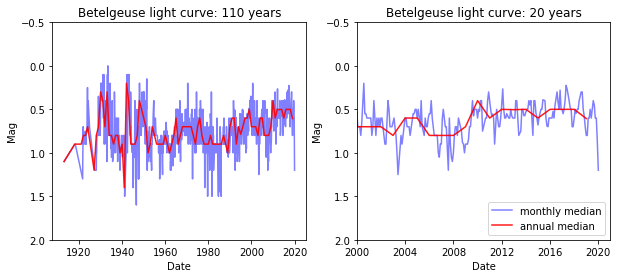

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 4)
for idx in range(2):
    ax[idx].plot(df_mo.index, df_mo['Mag'], 'b', alpha=.5, label='monthly median')
    ax[idx].plot(df_as.index, df_as['Mag'], 'r', alpha=.9, label='annual median')
    ax[idx].set_xlabel('Date')
    ax[idx].set_ylabel('Mag')
    ax[idx].set_title('Betelgeuse light curve: 110 years')
    ax[idx].set_ylim([2, -.5])
    if idx == 1:
        ax[idx].set_title('Betelgeuse light curve: 20 years')
        ax[idx].set_xlim([parser.parse('2000-01-01'), parser.parse('2021-01-01')])
        ax[idx].legend(loc='lower right')

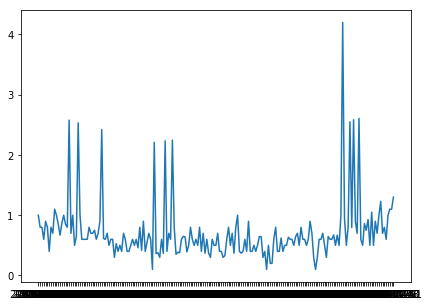

In [14]:
start_date = '2019-01-01'
end_date = '2019-12-01'
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(7, 5)
ax.plot(df.loc[start_date:end_date, :].index, df.loc[start_date:end_date, 'Mag'], label='all');